In [1]:
import pandas as pd 
import numpy as np
import torch 
import os
from matplotlib import pyplot as plt
import librosa as lb 
from IPython.display import Audio
import torch.utils.data.dataset as dataset
import tqdm as tqdm
import IPython
import torch.nn as nn
import torch.nn.functional as f
from torch import optim
import torchvision
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
import tqdm as tqdm
import torchaudio
import soundfile as sf
from sklearn.model_selection import train_test_split
device= torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

/l/vision/zekrom_hdd/joshisri/vm_new/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
waveforms=[]
final_label=[]
for i,j in enumerate(os.listdir('genres_original')):
  print()
  print(j)
  print('-'*50)
  # waveform_genre_train=[]
  # waveform_genre_test=[]
  label=[]
  for k,l in enumerate(os.listdir('genres_original/'+j)):
    if l!=".ipynb_checkpoints":
        print(l)
        waveform , sample_rate = lb.load('genres_original/'+j+'/'+l)
        waveforms_train_stft= lb.stft(waveform, n_fft=1024,hop_length=513)
        wave_train_transpose=np.transpose(np.abs(waveforms_train_stft[:,:1260]))
        waveforms.append(wave_train_transpose)
        final_label.append(i)


pop
--------------------------------------------------
pop.00027.wav
pop.00033.wav
pop.00032.wav
pop.00026.wav
pop.00030.wav
pop.00024.wav
pop.00018.wav
pop.00019.wav
pop.00025.wav
pop.00031.wav
pop.00009.wav
pop.00035.wav
pop.00021.wav
pop.00020.wav
pop.00034.wav
pop.00008.wav
pop.00022.wav
pop.00036.wav
pop.00037.wav
pop.00023.wav
pop.00044.wav
pop.00050.wav
pop.00078.wav
pop.00087.wav
pop.00093.wav
pop.00092.wav
pop.00086.wav
pop.00079.wav
pop.00051.wav
pop.00045.wav
pop.00053.wav
pop.00047.wav
pop.00090.wav
pop.00084.wav
pop.00085.wav
pop.00091.wav
pop.00046.wav
pop.00052.wav
pop.00056.wav
pop.00042.wav
pop.00095.wav
pop.00081.wav
pop.00080.wav
pop.00094.wav
pop.00043.wav
pop.00057.wav
pop.00069.wav
pop.00041.wav
pop.00055.wav
pop.00082.wav
pop.00096.wav
pop.00097.wav
pop.00083.wav
pop.00054.wav
pop.00040.wav
pop.00068.wav
pop.00065.wav
pop.00071.wav
pop.00059.wav
pop.00058.wav
pop.00070.wav
pop.00064.wav
pop.00072.wav
pop.00066.wav
pop.00099.wav
pop.00098.wav
pop.00067.wav
pop.00

In [4]:
X_train, X_test, y_train, y_test = train_test_split(waveforms,final_label,test_size=0.2,stratify=final_label,random_state=42)

In [5]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([20, 20, 20, 20, 20, 20, 20, 20, 20, 20]))

In [6]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([80, 80, 80, 80, 80, 80, 80, 80, 80, 80]))

In [7]:
train_dataset= torch.utils.data.TensorDataset(torch.tensor(X_train),torch.tensor(y_train))

/tmp/ipykernel_1278256/1639403705.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  train_dataset= torch.utils.data.TensorDataset(torch.tensor(X_train),torch.tensor(y_train))


In [8]:
test_dataset= torch.utils.data.TensorDataset(torch.tensor(X_test),torch.tensor(y_test))

In [9]:
torch.tensor(X_test).shape

torch.Size([200, 1260, 513])

In [10]:
train_dataloader= DataLoader(train_dataset,batch_size=10,shuffle=True)
test_dataloader= DataLoader(test_dataset,batch_size=10,shuffle=True)

In [11]:
for i,j in train_dataloader:
  # print(i.shape,j.shape)
  print(i.shape,j.shape)
  break

torch.Size([10, 1260, 513]) torch.Size([10])


In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1,64,kernel_size=3, padding = 1)
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(2)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(4)
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.pool4 = nn.MaxPool2d(4)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(77824, 1024)
        self.fc2 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x=x.reshape(10,1,1260,513)
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.pool4(F.relu(self.conv4(x)))
        # print(x.shape)
        # print(x.shape)
        x = self.dropout(x)
        # print(x.shape)
        x = x.reshape(10,77824)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = ConvNet()
print(model)

ConvNet(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool4): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=77824, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [18]:
# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# Define the loss function
loss_fn = torch.nn.CrossEntropyLoss()


In [23]:
train_loss_list = []
test_loss_list = []
target = []
prediction = []
epoch = 0
while epoch < 10:
  model.train()
  train_loss = 0
  test_loss = 0
  for feature,label in tqdm.tqdm(train_dataloader):
    output = model(feature) #sending the noisy data to the model and getting the output
    # output=output.view(-1).detach().cpu().numpy()
    # output=torch.tensor(output)
    # output=output.float()
    # output=float(torch.tensor(output))
    # print(output)
    loss = loss_fn(output,label) #calculating the loss of the model by comparing the model output and the ground truth
    optimizer.zero_grad() #cleaning the previous gradients
    loss.backward() #back propagating the loss
    optimizer.step() #updating the parameters based on the loss

    #accumulating train loss
    train_loss+=loss.item()
  train_loss_list.append(train_loss/len(train_dataloader))
  print(f"Train loss at epoch {epoch} is {train_loss/len(train_dataloader)}")
  #Testing loop
  with torch.no_grad():
    model.eval()
    for test_data,test_label in tqdm.tqdm(test_dataloader):     
      test_output = model(test_data)
      test_loss += loss_fn(test_output,test_label).item()
      predictions = test_output.argmax(1).cpu().numpy()
      target.extend(test_label.numpy().tolist())
      prediction.extend(predictions.tolist())
      
    test_loss_list.append(test_loss/len(test_dataloader))
    print(f"Test loss at epoch {epoch} is {test_loss/len(test_dataloader)}")
    print(f"Test accuracy at epoch{epoch} is ={accuracy_score(target,prediction)}")
    

  epoch+=1

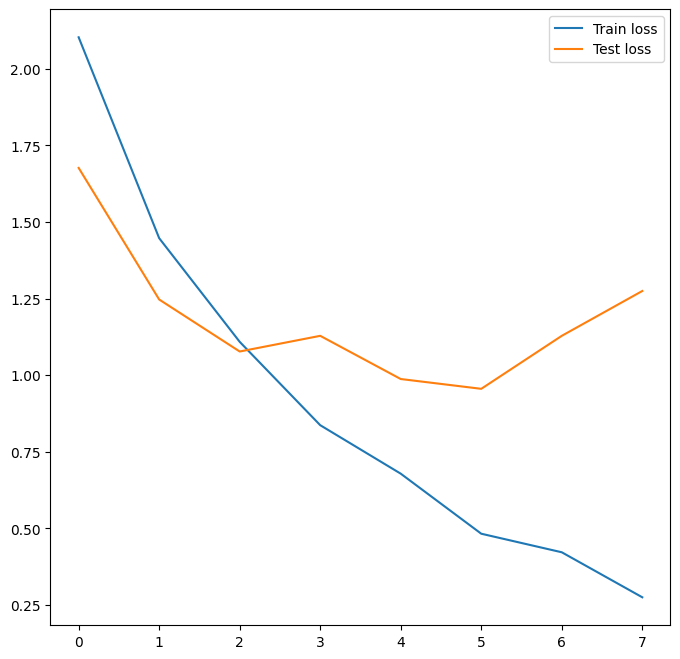

In [20]:
from scipy.ndimage import label
#plotting graphs
plt.rcParams['figure.figsize'] = [8,8]
plt.plot(train_loss_list,label="Train loss")
plt.plot(test_loss_list,label="Test loss")
plt.legend()

In [22]:
target = []
prediction = []
with torch.no_grad():
    model.eval()
    for test_data,test_label in tqdm.tqdm(test_dataloader):     
      test_output = model(test_data)
      test_loss += loss_fn(test_output,test_label).item()
      predictions = test_output.argmax(1).cpu().numpy()
      target.extend(test_label.numpy().tolist())
      prediction.extend(predictions.tolist())
    print(f"Test accuracy at epoch{epoch} is ={accuracy_score(target,prediction)}")

100%|███████████████████████████████████████████| 20/20 [00:43<00:00,  2.19s/it]

Test accuracy at epoch8 is =0.66
